In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [3]:
df = pd.read_csv("D:/Data Analysis/Files/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
# This converts objectified date into Datetime type

# Extracting the 'Year' into the new column
df["Year"] = df["Date"].dt.year

print(df[["Date", "Year"]].head())

        Date  Year
0 1908-09-17  1908
1 1912-07-12  1912
2 1913-08-06  1913
3 1913-09-09  1913
4 1913-10-17  1913


In [6]:
df.isnull().sum()
#I checked for missing values in each column

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
Year               0
dtype: int64

In [ ]:
deadliest_ops = df.groupby("Operator")["Fatalities"].e()
deadliest_ops = deadliest_ops.sort_values(ascending = False)
print("Top 10 Deadliest Opeartors in History:")
print(deadliest_ops.head(10))

Top 10 Deadliest Opeartors in History:
Operator
Aeroflot                           7156.0
Military - U.S. Air Force          3717.0
Air France                         1734.0
American Airlines                  1421.0
Pan American World Airways         1302.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1021.0
AVIANCA                             941.0
Turkish Airlines (THY)              891.0
Indian Airlines                     863.0
Name: Fatalities, dtype: float64


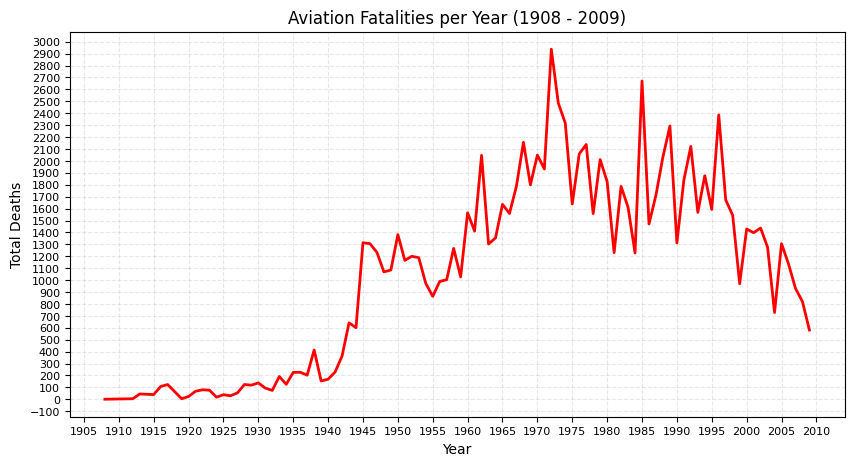

In [32]:
yearly_deaths = df.groupby("Year")["Fatalities"].sum()

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(yearly_deaths, color = "red", linewidth = 2)
ax.set_title("Aviation Fatalities per Year (1908 - 2009)")
ax.set_ylabel("Total Deaths")
ax.set_xlabel("Year")
plt.grid(True, linestyle = "--", alpha = 0.3)
plt.xticks(size=8)
plt.yticks(size=8)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [9]:
# Hangling missing values (NaN) first, so python won't crash
# fill empty summaries with uknown
df["Summary"] = df["Summary"].fillna("Uknown")

# Creating a filter (mask) for the word "lightning"
lightning_crashes = df[df["Summary"].str.contains("lightning", case = False)]
storm_crashes = df[df["Summary"].str.contains("storm", case = False)]
crash_ratio = (len(lightning_crashes) + len(storm_crashes)) / len(df) * 1000

print(f"Total crashes involving lightning or storm: {(len(lightning_crashes) + len(storm_crashes))}")
print()
print("Example Report")
print(lightning_crashes["Summary"].iloc[1])
print()
print(storm_crashes["Summary"].iloc[1])
print()
print(f"Crash Ratio is: {crash_ratio} out of 1000")

Total crashes involving lightning or storm: 290

Example Report
Struck by lightning and crashed into the BaltiSea.

The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.

Crash Ratio is: 55.04935459377373 out of 1000


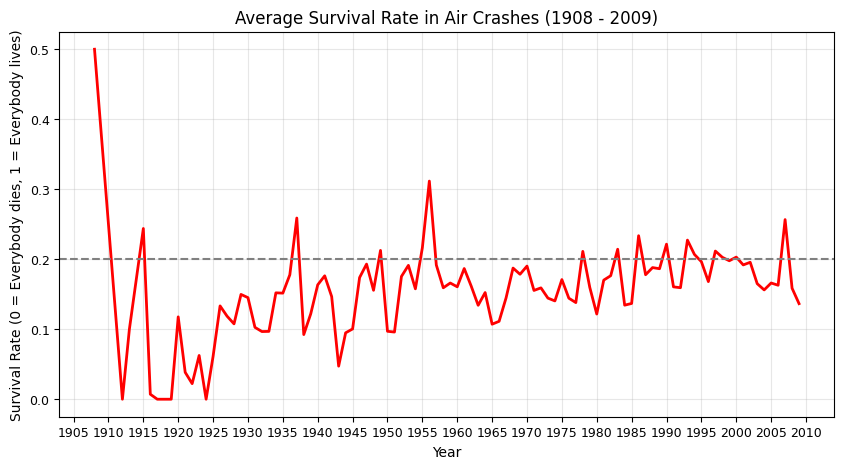

In [10]:
# Removing rows where 'Aboard' is 0 or NaN to avoid division by zero
df_clean = df[df["Aboard"] > 0].copy()

# Calculate the Ratio
# (Total People - Dead People) / Total People
df_clean["Survival_Rate"] = (df_clean["Aboard"] - df_clean["Fatalities"]) / df_clean["Aboard"] #type: ignore

# Group by Year and get the Average (Mean) survival rate
yearly_survival = df_clean.groupby("Year")["Survival_Rate"].mean()

# Visualizing the Average Survival Rate per Year
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(yearly_survival, color = "red", linewidth = 2)
ax.set_title("Average Survival Rate in Air Crashes (1908 - 2009)")
ax.set_ylabel("Survival Rate (0 = Everybody dies, 1 = Everybody lives)")
ax.set_xlabel("Year")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.yticks(size=9)
plt.xticks(size=9)
plt.axhline(y=0.2, color = "gray", linestyle = "--")
plt.grid(True, alpha = 0.3)
plt.show()

In [11]:
#Analyze the % of survival chances for 1910-1920 and 2000s
survival_1910_1920 = yearly_survival.loc[1910:1920].mean()
survival_2000s = yearly_survival.loc[2000:2009].mean()
print(f"Average Survival Rate from 1910-1920: {survival_1910_1920 *100:.2f}%")
print(f"Average Survival Rate from 2000-2009: {survival_2000s *100:.2f}%")

Average Survival Rate from 1910-1920: 5.86%
Average Survival Rate from 2000-2009: 17.92%


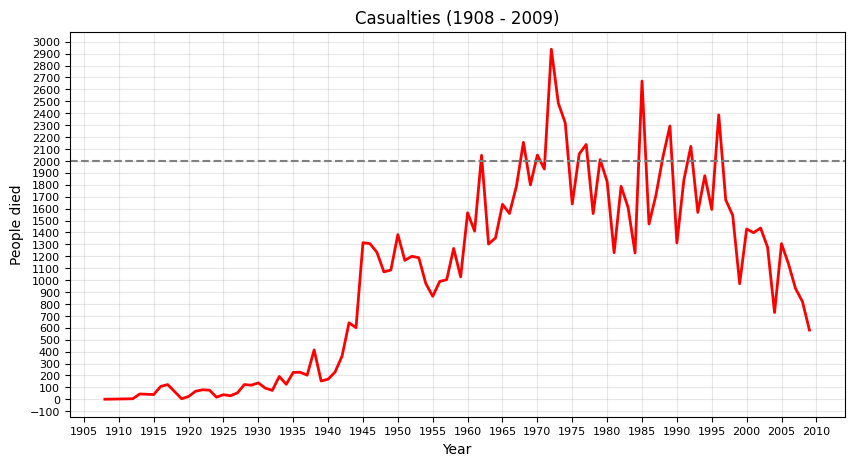

Top 10 Deadliest Years in Aviation History:
Year
1972    2937.0
1985    2670.0
1973    2485.0
1996    2386.0
1974    2318.0
1989    2293.0
1968    2156.0
1977    2138.0
1992    2122.0
1976    2059.0
Name: Fatalities, dtype: float64


In [12]:
casualty_data = df.groupby("Year")["Fatalities"].sum()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(casualty_data, color = "red", linewidth = 2)
ax.set_title("Casualties (1908 - 2009)")
ax.set_ylabel("People died")
ax.set_xlabel("Year")
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(size = 8)
plt.yticks(size = 8)


plt.axhline(y=2000, color = "gray", linestyle = "--")
plt.grid(True, alpha = 0.3)
plt.show()
casualty_data = casualty_data.sort_values(ascending = False)
print("Top 10 Deadliest Years in Aviation History:")
print(casualty_data.head(10))
# I visualized the total number of casualties per year from 1908 to 2009

Most Deadliest Plane Types in History:
Type
Douglas DC-3                  4793.0
Antonov AN-26                 1068.0
Douglas DC-6B                 1055.0
Douglas C-47                  1046.0
McDonnell Douglas DC-9-32      951.0
Douglas DC-4                   930.0
Ilyushin IL-18B                852.0
Yakovlev YAK-40                834.0
Tupolev TU-134A                809.0
McDonnell Douglas DC-10-10     804.0
Name: Fatalities, dtype: float64


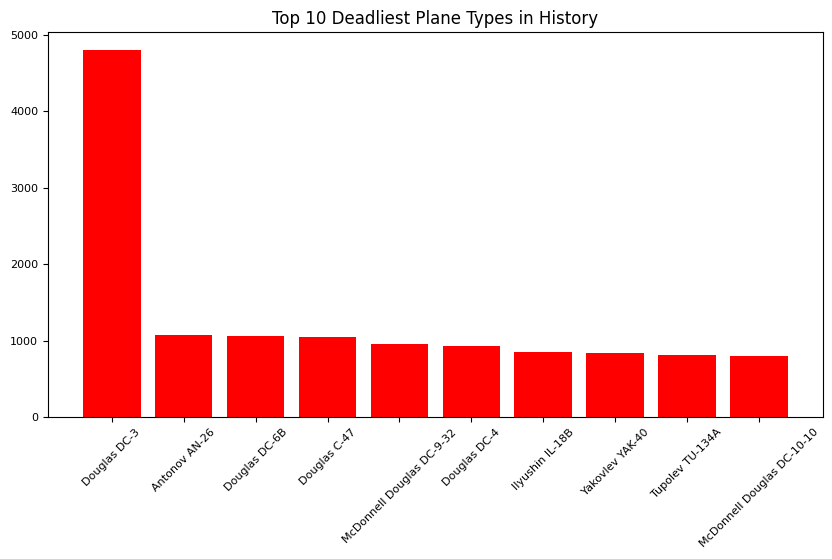

In [13]:
deadliest_plane = df.groupby("Type")["Fatalities"].sum()
deadliest_plane = deadliest_plane.sort_values(ascending = False)
print("Most Deadliest Plane Types in History:")
print(deadliest_plane.head(10))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(deadliest_plane.head(10).index, deadliest_plane.head(10).values, color = "red") #type: ignore
ax.set_title("Top 10 Deadliest Plane Types in History")
plt.xticks(rotation = 45, size = 8)
plt.yticks(size = 8)
plt.show()

In [14]:
dc3 = df[df["Type"] == "Douglas DC-3"]
print(len(dc3))
print(len(df[df["Type"] == "Antonov AN-26"]))
# I checked the number of crashes for specific plane types

334
36


In [15]:
df = df.rename(columns={"cn/In": "Serial_Number", "Type": "Aircraft_Type"})
#I renamed columns for better clarity

In [16]:
#df = df.dropna(subset="Time")
#I removed rows with missing 'Time' values
print(len(df))
# I checked the length of the dataframe after removing rows with missing 'Time' values

5268


In [17]:
df["Casualty"] = np.where(df["Fatalities"] > 50, "High", "Low")
#I created a new column 'Casualty' to categorize crashes based on fatalities

In [18]:
df["Survivors"] = df["Aboard"] - df["Fatalities"]
#I created a new column 'Survivors' to calculate the number of survivors in each crash
print(df["Fatalities"].sum())
print(df["Aboard"].sum())

105479.0
144551.0


In [19]:
casualty_data = df.groupby("Operator").agg(
    {"Fatalities": ["count", "sum"],
     "Survivors" : "sum"})
casualty_data = casualty_data.sort_values(by=("Fatalities", "sum"), ascending = False)
print(casualty_data.head(10))

                                Fatalities         Survivors
                                     count     sum       sum
Operator                                                    
Aeroflot                               179  7156.0    1714.0
Military - U.S. Air Force              176  3717.0     785.0
Air France                              69  1734.0    1145.0
American Airlines                       36  1421.0     642.0
Pan American World Airways              41  1302.0    1511.0
Military - U.S. Army Air Forces         43  1070.0      30.0
United Air Lines                        44  1021.0    1439.0
AVIANCA                                 24   941.0     126.0
Turkish Airlines (THY)                  14   891.0      73.0
Indian Airlines                         34   863.0     590.0


In [20]:
data_1972_1994 = df[(df["Year"] == 1972) | (df["Year"] == 1994)]
print(data_1972_1994)

print("\n\n\n\n")

date = [1972, 1994]
data_1972_1994 = df[df["Year"].isin(date)]
print(data_1972_1994)

#I searched for crashes which happened only on 1972 and 1994 with two different methods

           Date   Time                    Location  \
2517 1972-01-06    NaN       Near Chetumal, Mexico   
2518 1972-01-07  22:00  Sierra de Atalayasa, Spain   
2519 1972-01-18  01:04          Chambers, Nebraska   
2520 1972-01-21    NaN          Near Adana, Turkey   
2521 1972-01-21    NaN        Near Funza, Colombia   
...         ...    ...                         ...   
4305 1994-12-17  10:30      Cerro Aicha, Venezuela   
4306 1994-12-17  13:20           Papua, New Guinea   
4307 1994-12-21  09:53           Coventry, England   
4308 1994-12-26  17:00    Algiers Airport, Algeria   
4309 1994-12-29  15:30            Near Van, Turkey   

                            Operator Flight #                        Route  \
2517                           SAESA      NaN            Chetumel - Merida   
2518                 Iberia Airlines      602             Valencia - Ibiza   
2519  Kime Flying Service - Air Taxi      NaN  Omaha, NE - Hot Springs, SD   
2520          Turkish Airlines (THY)   

In [21]:
mountain_crashes = df[df["Summary"].str.contains("mountain", case = False)]
print(len(mountain_crashes))

718


In [22]:
df["Month"] = df["Date"].dt.month                     #type: ignore
pivot = df.pivot_table(index = "Year",
                         columns = "Month",
                           values = "Fatalities",
                             aggfunc= "sum",
                             fill_value=0)


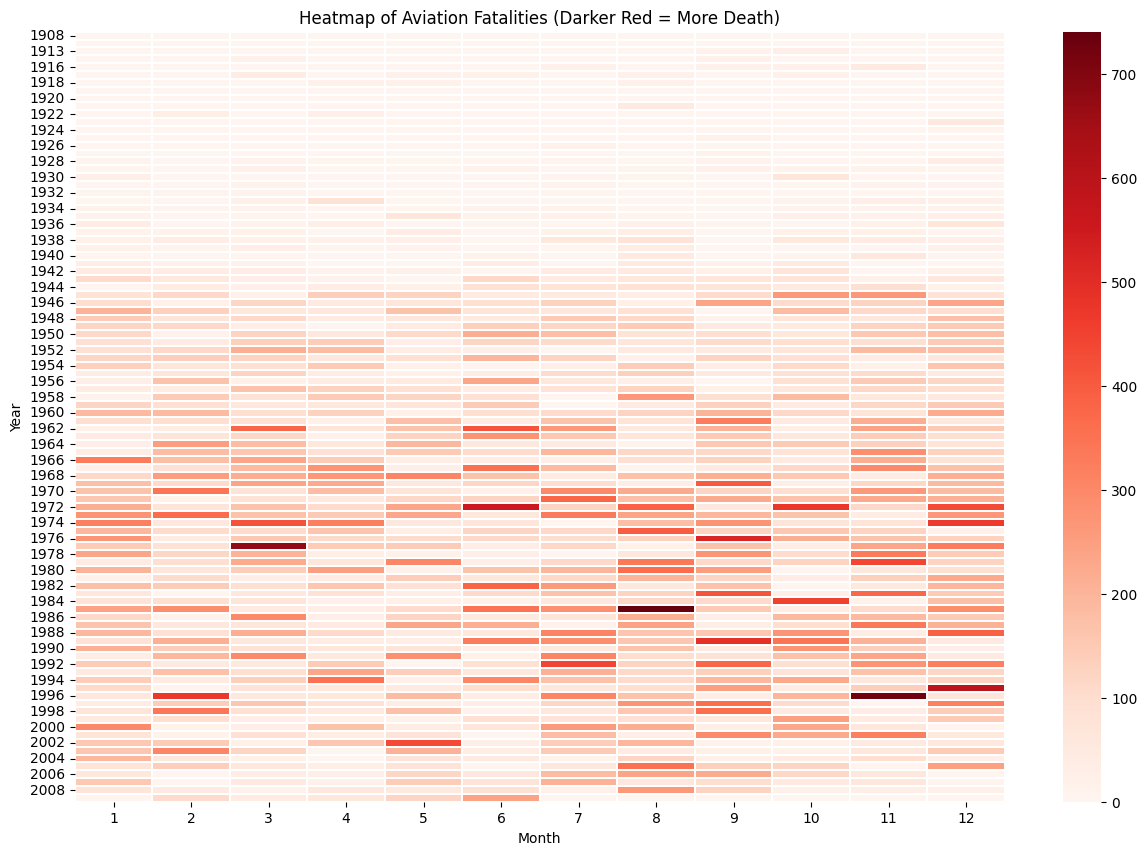

In [23]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='Reds', linecolor='white', linewidths=0.1)
plt.title("Heatmap of Aviation Fatalities (Darker Red = More Death)")
plt.show()

In [24]:
pd.set_option('display.max_columns', None) # Forcing Python to show all 12 months
print(pivot.head())
print(pivot.tail()) # See the most recent years

Month   1    2     3    4    5    6     7    8     9     10    11   12
Year                                                                  
1908   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0   1.0   0.0   0.0  0.0
1912   0.0  0.0   0.0  0.0  0.0  0.0   5.0  0.0   0.0   0.0   0.0  0.0
1913   0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0  14.0  30.0   0.0  0.0
1915   0.0  0.0  21.0  0.0  0.0  0.0   0.0  0.0  19.0   0.0   0.0  0.0
1916   0.0  0.0   0.0  0.0  0.0  0.0  20.0  0.0  22.0  19.0  47.0  0.0
Month     1      2     3     4      5      6      7      8      9      10  \
Year                                                                        
2005    73.0  138.0  57.0  34.0   77.0    7.0   60.0  351.0  134.0  120.0   
2006    65.0    4.0  38.0  29.0  118.0   59.0  183.0  240.0  222.0  115.0   
2007   153.0    4.0  48.0  21.0  139.0   76.0  208.0   61.0   99.0   52.0   
2008    72.0   51.0  13.0  61.0   54.0   92.0   18.0  263.0  123.0   22.0   
2009     8.0  102.0  44.0  65.0  120.0  2

In [25]:
print(pivot.loc[2000])

Month
1     299.0
2      17.0
3      30.0
4     165.0
5      41.0
6      68.0
7     260.0
8     217.0
9      34.0
10    230.0
11     62.0
12      6.0
Name: 2000, dtype: float64


In [26]:
df.to_csv("cleaned_airplane_crashes.csv")